![Indonesian cyberpunk street market, generated using Stable Diffusion v1.5 and Cyberpunk Scene LoRA.](hello-world_files/cover.png)

This is one of my (many) blogging attempts, and the second one that use markdown as the writing medium. I used [blogdown](https://github.com/rstudio/blogdown) in my previous blog since I mainly use R for my data science related tasks. After migrated to Python and React, I decided to use [Next.js](https://nextjs.org/) for its Static Site Generator (SSG) feature, which (after some hacking) could seamlessly support markdown and Jupyter Notebook as the page source&#8212;will definitely share my experience in developing this blog soon! 😎

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
100%|██████████| 20/20 [00:03<00:00,  6.38it/s]


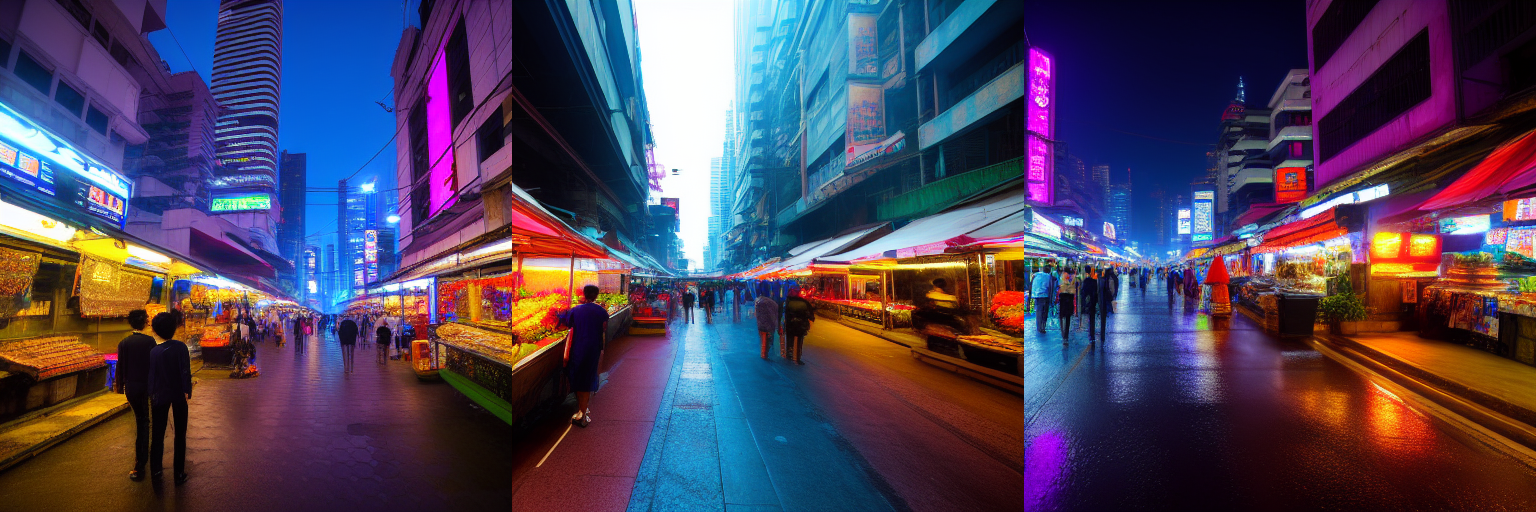

In [5]:
from PIL import Image
import torch
from diffusers import DiffusionPipeline
from diffusers import EulerAncestralDiscreteScheduler
from diffusers.utils import logging

logging.set_verbosity_error()

COMMON_NEGATIVE_PROMPTS = "(((deformed))), blurry, bad anatomy, disfigured, poorly drawn face, mutation, mutated, (extra_limb), (ugly), (poorly drawn hands), fused fingers, messy drawing, broken legs censor, censored, censor_bar, multiple breasts, (mutated hands and fingers:1.5), (long body :1.3), (mutation, poorly drawn :1.2), black-white, bad anatomy, liquid body, liquidtongue, disfigured, malformed, mutated, anatomical nonsense, text font ui, error, malformed hands, long neck, blurred, lowers, low res, bad anatomy, bad proportions, bad shadow, uncoordinated body, unnatural body, fused breasts, bad breasts, huge breasts, poorly drawn breasts, extra breasts, liquid breasts, heavy breasts, missingbreasts, huge haunch, huge thighs, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, fusedears, bad ears, poorly drawn ears, extra ears, liquid ears, heavy ears, missing ears, old photo, low res, black and white, black and white filter, colorless, (((deformed))), blurry, bad anatomy, disfigured, poorly drawn face, mutation, mutated, (extra_limb), (ugly), (poorly drawn hands), fused fingers, messy drawing, broken legs censor, censored, censor_bar, multiple breasts, (mutated hands and fingers:1.5), (long body :1.3), (mutation, poorly drawn :1.2), black-white, bad anatomy, liquid body, liquid tongue, disfigured, malformed, mutated, anatomical nonsense, text font ui, error, malformed hands, long neck, blurred, lowers, low res, bad anatomy, bad proportions, bad shadow, uncoordinated body, unnatural body, fused breasts, bad breasts, huge breasts, poorly drawn breasts, extra breasts, liquid breasts, heavy breasts, missing breasts, huge haunch, huge thighs, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, fused ears, bad ears, poorly drawn ears, extra ears, liquid ears, heavy ears, missing ears, old photo, low res, black and white, black and white filter, colorless, (((deformed))), blurry, bad anatomy, disfigured, poorly drawn face, mutation, mutated, (extra_limb), (ugly), (poorly drawn hands), fused fingers, messy drawing, broken legs censor, censored, censor_bar, multiple breasts, (mutated hands and fingers:1.5), (long body :1.3), (mutation, poorly drawn :1.2), black-white, bad anatomy, liquid body, liquid tongue, disfigured, malformed, mutated, anatomical nonsense, text font ui, error, malformed hands, long neck, blurred, lowers, low res, bad anatomy, bad proportions, bad shadow, uncoordinated body, unnatural body, fused breasts, bad breasts, huge breasts, poorly drawn breasts, extra breasts, liquid breasts, heavy breasts, missing breasts, huge haunch, huge thighs, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, fused ears, bad ears, poorly drawn ears, extra ears, liquid ears, heavy ears, missing ears, (((deformed))), blurry, bad anatomy, disfigured, poorly drawn face, mutation, mutated, (extra_limb), (ugly), (poorly drawn hands), fused fingers, messy drawing, broken legs censor, censored, censor_bar, multiple breasts, (mutated hands and fingers:1.5), (long body :1.3), (mutation, poorly drawn :1.2), black-white, bad anatomy, liquid body, liquidtongue, disfigured, malformed, mutated, anatomical nonsense, text font ui, error, malformed hands, long neck, blurred, lowers, low res, bad anatomy, bad proportions, bad shadow, uncoordinated body, unnatural body, fused breasts, bad breasts, huge breasts, poorly drawn breasts, extra breasts, liquid breasts, heavy breasts, missingbreasts, huge haunch, huge thighs, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, fusedears, bad ears, poorly drawn ears, extra ears, liquid ears, heavy ears, missing ears, "

pipeline = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
)
pipeline.to("cuda")
pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(
    pipeline.scheduler.config
)

pipeline.load_lora_weights(
    "hello-world_data/Cyberpunk sceneV1.safetensors",
)

inference = pipeline(
    ["tooimage, futuristic city, (jakarta), (street market), cyberpunk, realistic, night, <lora:Cyberpunk sceneV1:1>"] * 3,
    negative_prompt=[COMMON_NEGATIVE_PROMPTS] * 3,
    num_inference_steps=20,
    guidance_scale=7,
)

def image_grid(imgs, rows, cols):
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

image_grid(inference.images, rows=1, cols=3)